In [1]:
!conda activate testface


In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import keras_preprocessing.image.utils
from PIL import Image

In [3]:
TRAIN_DIR = 'F:/3dataset/images/train'
TEST_DIR = 'F:/3dataset/images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                            image     label
0            F:/3dataset/images/train\angry\0.jpg     angry
1            F:/3dataset/images/train\angry\1.jpg     angry
2           F:/3dataset/images/train\angry\10.jpg     angry
3        F:/3dataset/images/train\angry\10002.jpg     angry
4        F:/3dataset/images/train\angry\10016.jpg     angry
...                                           ...       ...
28816  F:/3dataset/images/train\surprise\9969.jpg  surprise
28817  F:/3dataset/images/train\surprise\9985.jpg  surprise
28818  F:/3dataset/images/train\surprise\9990.jpg  surprise
28819  F:/3dataset/images/train\surprise\9992.jpg  surprise
28820  F:/3dataset/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                          image     label
0       F:/3dataset/images/test\angry\10052.jpg     angry
1       F:/3dataset/images/test\angry\10065.jpg     angry
2       F:/3dataset/images/test\angry\10079.jpg     angry
3       F:/3dataset/images/test\angry\10095.jpg     angry
4       F:/3dataset/images/test\angry\10121.jpg     angry
...                                         ...       ...
7061  F:/3dataset/images/test\surprise\9806.jpg  surprise
7062  F:/3dataset/images/test\surprise\9830.jpg  surprise
7063  F:/3dataset/images/test\surprise\9853.jpg  surprise
7064  F:/3dataset/images/test\surprise\9878.jpg  surprise
7065   F:/3dataset/images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         F:/3dataset/images/test\angry\10052.jpg
1         F:/3dataset/images/test\angry\10065.jpg
2         F:/3dataset/images/test\angry\10079.jpg
3         F:/3dataset/images/test\angry\10095.jpg
4         F:/3dataset/images/test\angry\10121.jpg
                          ...

In [9]:
from tqdm.notebook import tqdm

In [10]:
for image in tqdm(train['image']):
        print(image)

  0%|          | 0/28821 [00:00<?, ?it/s]

F:/3dataset/images/train\angry\0.jpg
F:/3dataset/images/train\angry\1.jpg
F:/3dataset/images/train\angry\10.jpg
F:/3dataset/images/train\angry\10002.jpg
F:/3dataset/images/train\angry\10016.jpg
F:/3dataset/images/train\angry\10037.jpg
F:/3dataset/images/train\angry\10038.jpg
F:/3dataset/images/train\angry\10057.jpg
F:/3dataset/images/train\angry\10063.jpg
F:/3dataset/images/train\angry\10069.jpg
F:/3dataset/images/train\angry\10100.jpg
F:/3dataset/images/train\angry\10105.jpg
F:/3dataset/images/train\angry\10115.jpg
F:/3dataset/images/train\angry\10122.jpg
F:/3dataset/images/train\angry\10142.jpg
F:/3dataset/images/train\angry\1015.jpg
F:/3dataset/images/train\angry\10154.jpg
F:/3dataset/images/train\angry\10155.jpg
F:/3dataset/images/train\angry\10158.jpg
F:/3dataset/images/train\angry\1016.jpg
F:/3dataset/images/train\angry\10167.jpg
F:/3dataset/images/train\angry\10178.jpg
F:/3dataset/images/train\angry\1018.jpg
F:/3dataset/images/train\angry\10181.jpg
F:/3dataset/images/train\angry

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [12]:
pip show keras-preprocessing

Name: Keras-Preprocessing
Version: 1.1.2
Summary: Easy data preprocessing and data augmentation for deep learning models
Home-page: https://github.com/keras-team/keras-preprocessing
Author: Keras Team
Author-email: 
License: MIT
Location: e:\anaconda\anaconda\envs\testface\lib\site-packages
Requires: numpy, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [13]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

e:\anaconda\anaconda\envs\testface\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [14]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [15]:
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [18]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [20]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [20]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
202/226 [=========================>....] - ETA: 1:16 - loss: 1.8230 - accuracy: 0.2453

KeyboardInterrupt: 

In [21]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [22]:
from keras.models import model_from_json

In [23]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [33]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [37]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 46ms/step
model prediction is  sad


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 55ms/step
model prediction is  sad


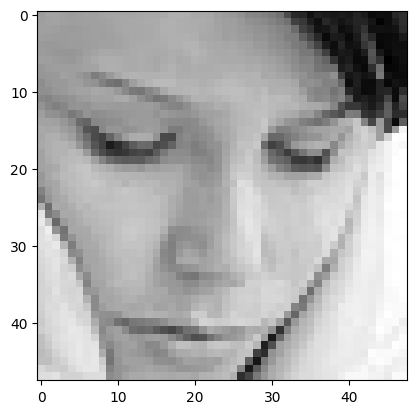

In [42]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 31ms/step
model prediction is  sad


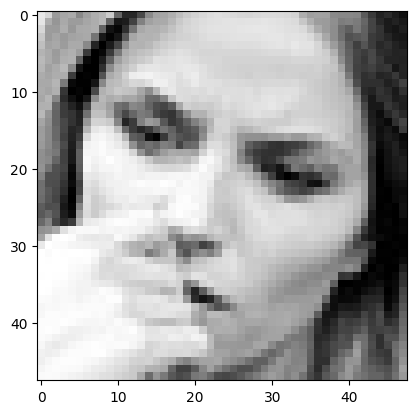

In [43]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 57ms/step
model prediction is  disgust


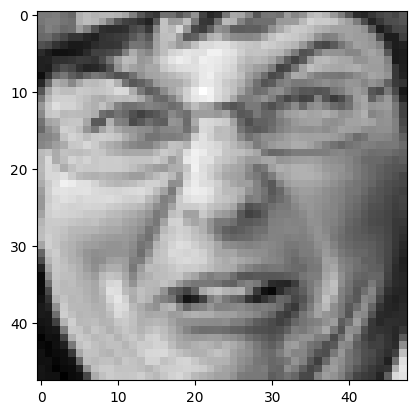

In [44]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 42ms/step
model prediction is  happy


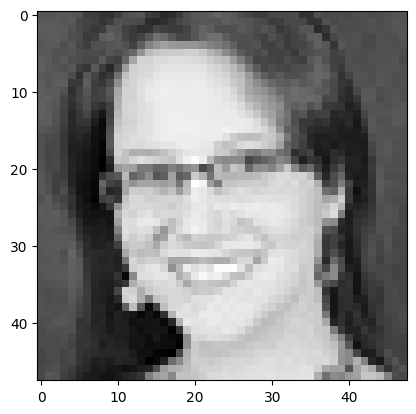

In [45]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 40ms/step
model prediction is  surprise


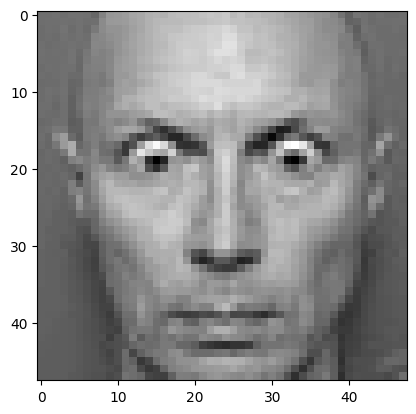

In [46]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')